**Melanoma Skin Cancer Tumor Size Prediction**

In [ ]:
! pip install pandas
! pip install numpy
! pip install python -m venv sklearn-env
! pip installsklearn-env\Scripts\activate  # activate
! pip install -U scikit-learn



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -m
ERROR: unknown command "installsklearn-envScriptsactivate"
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
! git clone https://github.com/souvik3333/Testing-and-Debugging-Tools

Cloning into 'Testing-and-Debugging-Tools'...
remote: Enumerating objects: 247, done.
remote: Total 247 (delta 0), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (247/247), 25.26 MiB | 20.74 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving tumor_train.csv to tumor_train.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['tumor_train.csv']))

In [ ]:
df2.describe()

Id     mass_npea    size_npear  malign_ratio  damage_size  \
count  7316.000000   7316.000000   7316.000000   7316.000000  7316.000000   
mean   4572.895571   9903.203540   3033.187635      0.303091   103.910231   
std    2634.666726   4035.017571   1453.517395      0.062637    55.303260   
min       1.000000   2864.760000    520.330000      0.121610    10.310100   
25%    2298.750000   6983.410000   1986.167500      0.258622    64.011200   
50%    4561.500000   8894.730000   2688.000000      0.300660    88.608100   
75%    6850.250000  12137.375000   3846.612500      0.343133   134.358000   
max    9145.000000  36995.400000  13535.000000      0.525300   344.346000   

       exposed_area  std_dev_malign    err_malign  malign_penalty  \
count  7.316000e+03     7316.000000   7316.000000     7316.000000   
mean   1.372354e+06      146.409698   3979.876145       69.964735   
std    5.610871e+05       70.223909   1472.446085       55.756789   
min    3.878534e+05       31.970400   1089.190000        0.000000   
25%    9.598202e+05       95.617575   3175.735000       31.000000   
50%    1.238623e+06      126.619000   3849.515000       54.000000   
75%    1.696990e+06      182.591500   4671.912500       91.000000   
max    4.978616e+06      528.890000  53031.300000      340.000000   

       damage_ratio   tumor_size  
count   7316.000000  7316.000000  
mean      34.441391     7.693081  
std        5.976883     6.092732  
min       15.228000     0.000000  
25%       30.211175     2.301500  
50%       35.236250     5.007000  
75%       38.826025    13.336000  
max       46.546400    20.985000

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              7316 non-null   int64  
 1   mass_npea       7316 non-null   float64
 2   size_npear      7316 non-null   float64
 3   malign_ratio    7316 non-null   float64
 4   damage_size     7316 non-null   float64
 5   exposed_area    7316 non-null   float64
 6   std_dev_malign  7316 non-null   float64
 7   err_malign      7316 non-null   float64
 8   malign_penalty  7316 non-null   int64  
 9   damage_ratio    7316 non-null   float64
 10  tumor_size      7316 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 628.8 KB


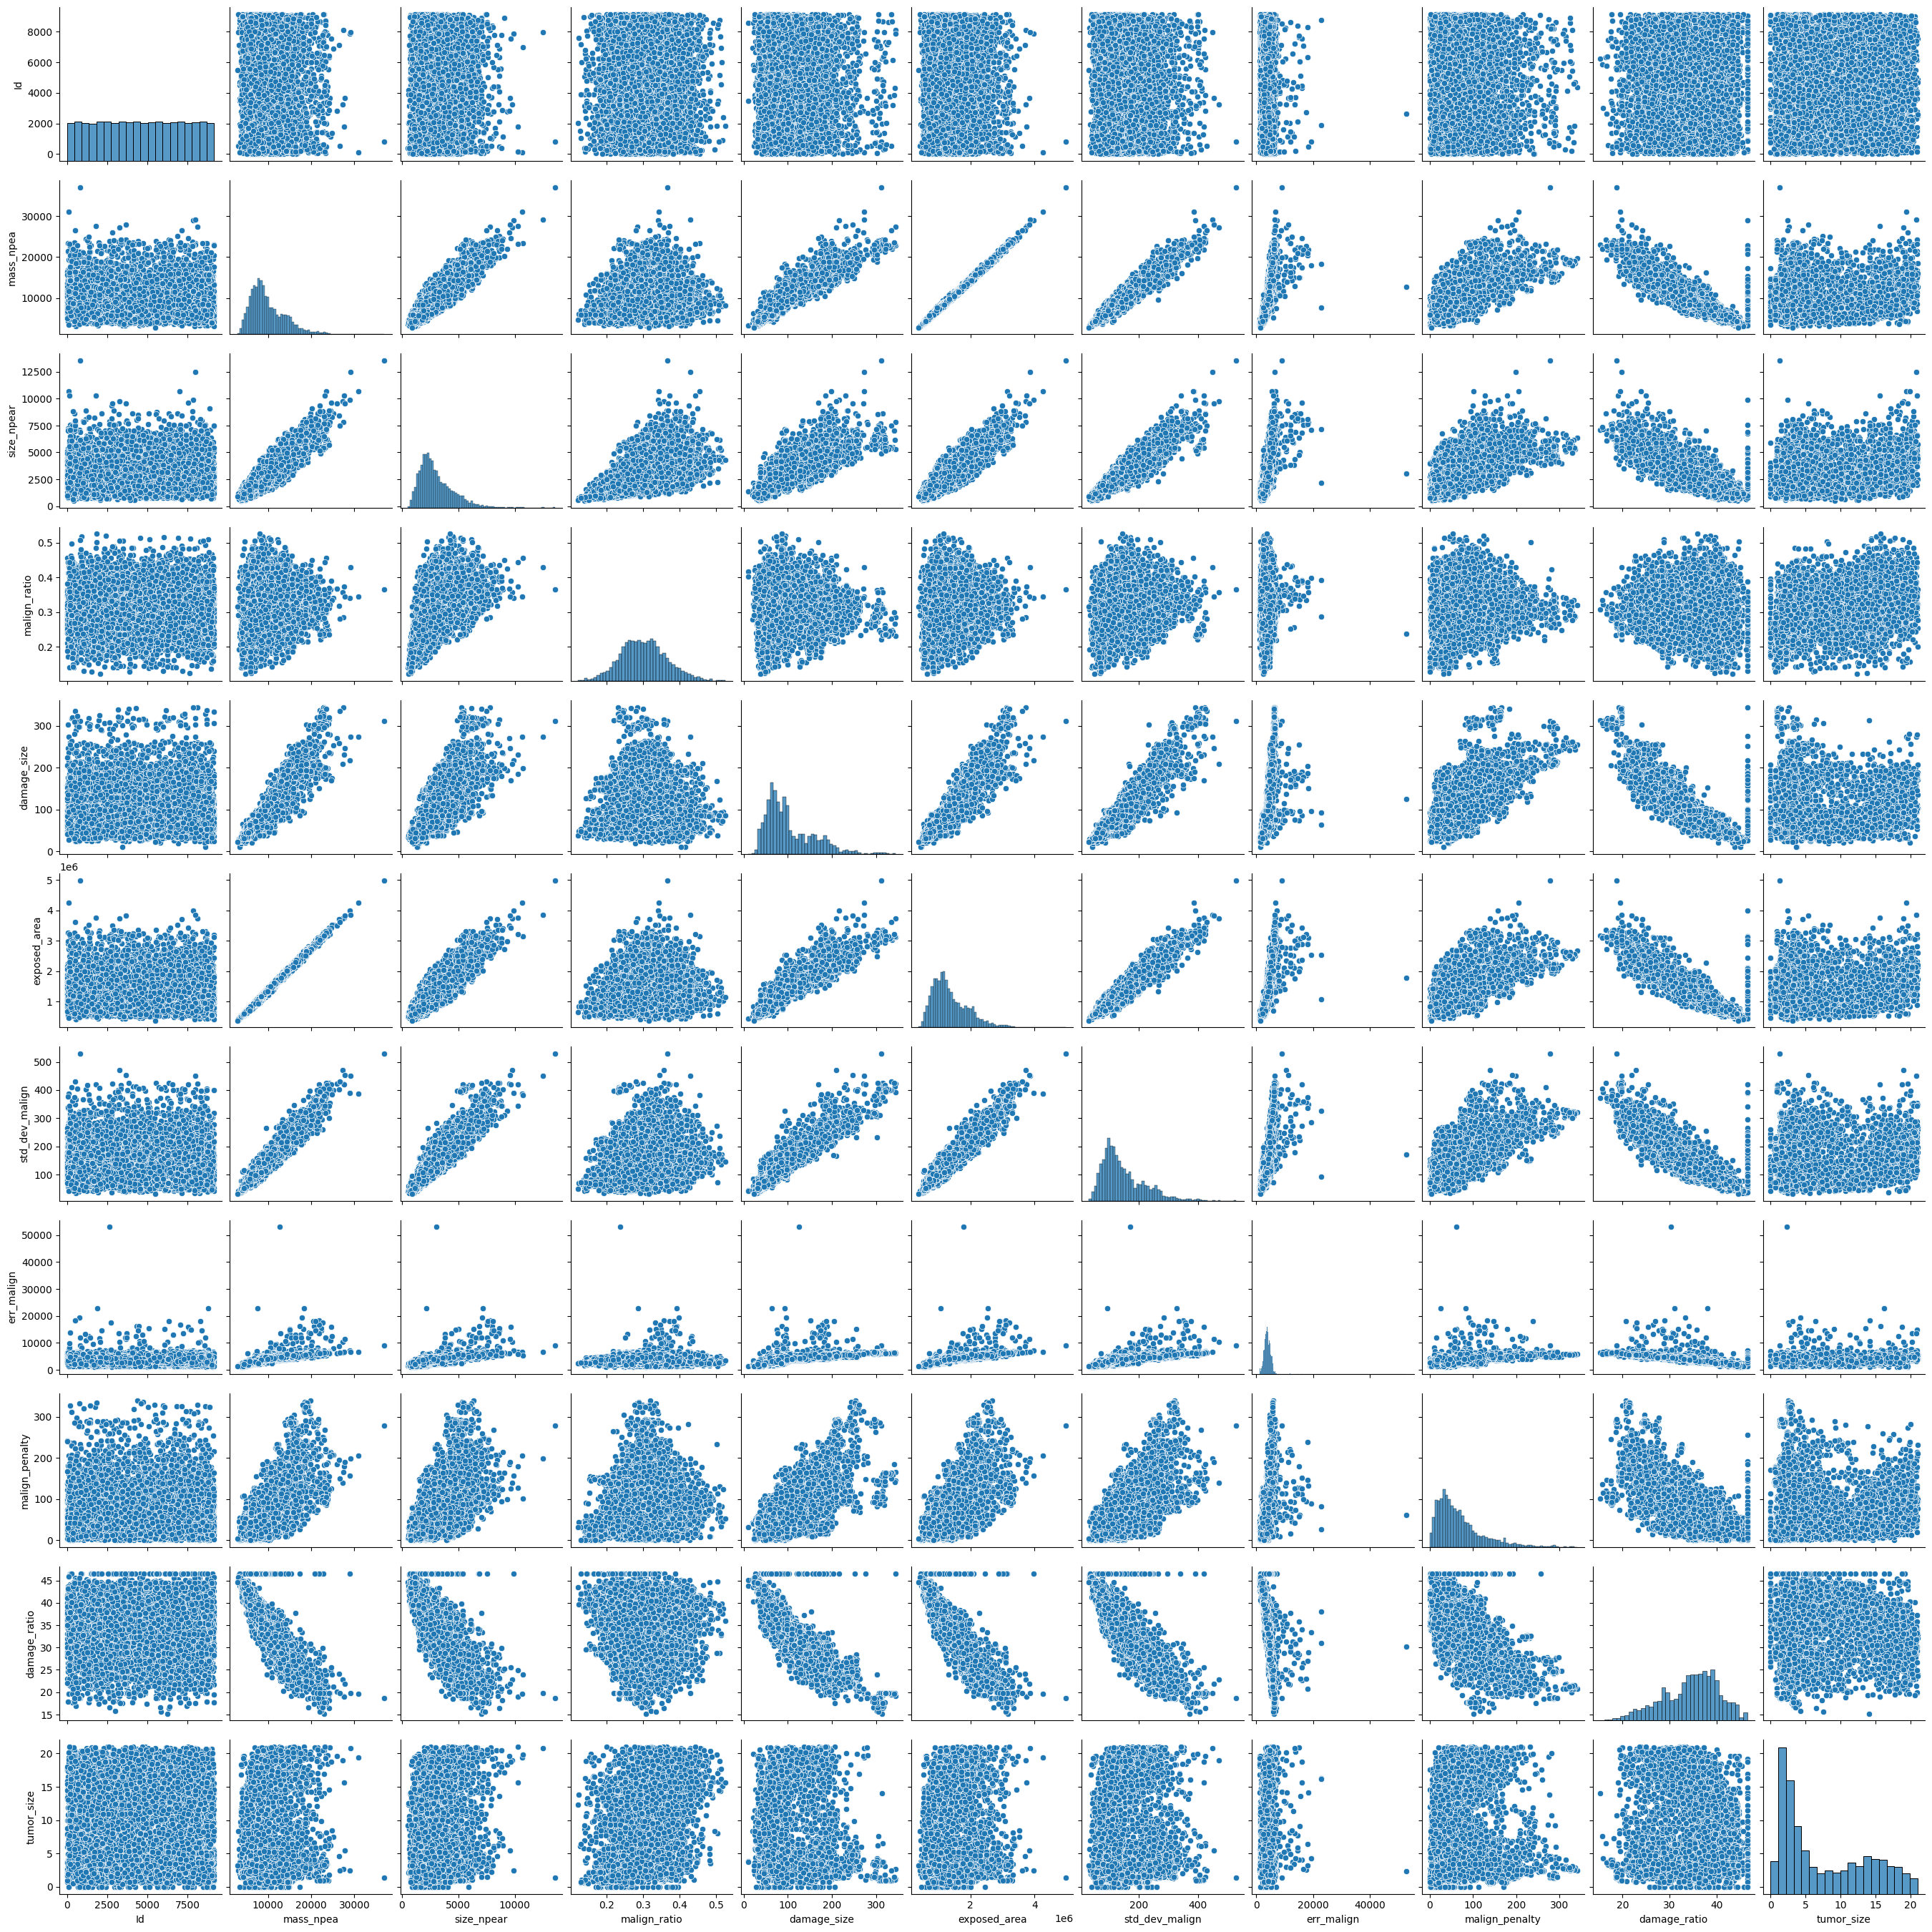

In [ ]:
sns.pairplot(df2)

Text(0.5, 1.0, 'Correlation HeatMap')

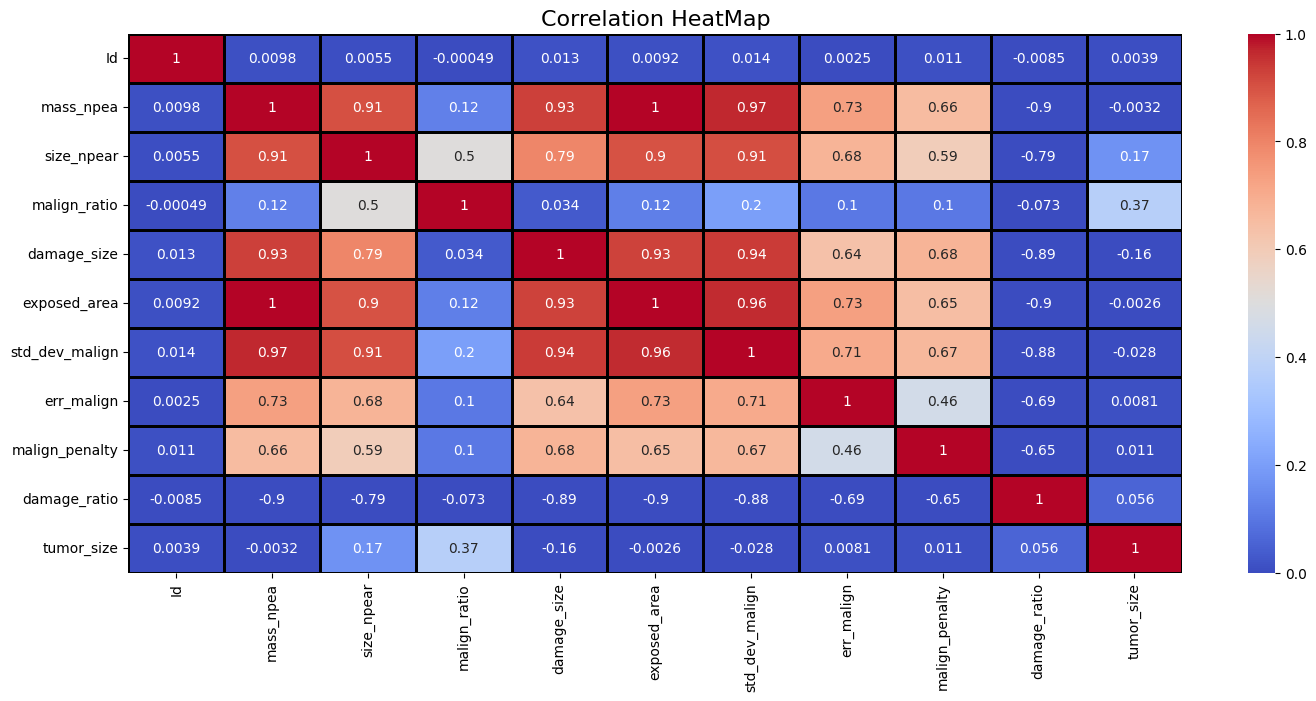

In [ ]:
figure = plt.figure(figsize = (17,7))
Heatmap = sns.heatmap(df2.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
Heatmap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

In [ ]:
data_features = df2.drop(['tumor_size'],axis = 1)           # Feature/Independent Variable
data_target = df2['tumor_size']                             # Target/Dependent Variable

In [ ]:
data_features.head(1)

Id  mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0  2484    8966.25      2290.1       0.25541      86.3614  1.210154e+06   

   std_dev_malign  err_malign  malign_penalty  damage_ratio  
0         123.099     3801.09              37       35.3347

In [ ]:
data_target.head(1)

0    2.04
Name: tumor_size, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=0)

In [ ]:
print('Train cases as below')          # Print the shape of Train and Test data
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (5852, 10)
y_train shape:  (5852,)

Test cases as below
X_test shape:  (1464, 10)
y_test shape:  (1464,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
data_features.columns

Index(['Id', 'mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio'],
      dtype='object')

In [ ]:
feature = X_train.drop('Id', axis= 1)
numeric_features = feature.columns
numeric_features

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio'],
      dtype='object')

In [ ]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [ ]:
X_test[numeric_features] = sc.transform(X_test[numeric_features])

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor

In [ ]:
lr= LogisticRegression()
ln= LinearRegression()
d_tree = DecisionTreeRegressor(max_leaf_nodes=10, max_features= "sqrt", max_depth=12, min_samples_split=5, min_samples_leaf=4)
rfc= RandomForestRegressor(n_estimators = 20, random_state = 4)
knn = KNeighborsRegressor(n_neighbors = 3)
xgb = XGBRegressor(random_state=101)
ab = AdaBoostRegressor(n_estimators=50, random_state=101)
gb = GradientBoostingRegressor(random_state=101)

In [ ]:
print('Linear Regression: ', ln.fit(X_train, y_train))
print('Decision Tree: ', d_tree.fit(X_train, y_train))
print('Random Forest: ', rfc.fit(X_train, y_train))
print('KNN: ', knn.fit(X_train, y_train))

print('XGB: ', xgb.fit(X_train, y_train))
print('AdaB: ', ab.fit(X_train, y_train))
print('GB: ', gb.fit(X_train, y_train))

Linear Regression:  LinearRegression()
Decision Tree:  DecisionTreeRegressor(max_depth=12, max_features='sqrt', max_leaf_nodes=10,
                      min_samples_leaf=4, min_samples_split=5)
Random Forest:  RandomForestRegressor(n_estimators=20, random_state=4)
KNN:  KNeighborsRegressor(n_neighbors=3)
XGB:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
  

In [ ]:
pred_ln = ln.predict(X_train)
pred_dt = d_tree.predict(X_train)
pred_rf = rfc.predict(X_train)
pred_knn = knn.predict(X_train)
pred_xgb = xgb.predict(X_train)
pred_ab = ab.predict(X_train)
pred_gb = gb.predict(X_train)

In [ ]:
pred_ln_test = ln.predict(X_test)
pred_dt_test = d_tree.predict(X_test)
pred_rf_test = rfc.predict(X_test)
pred_knn_test = knn.predict(X_test)
pred_xgb_test = xgb.predict(X_test)
pred_ab_test = ab.predict(X_test)
pred_gb_test = gb.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
r2_score_LR = r2_score(y_train, pred_ln)
mse_score_LR = mean_squared_error(y_train, pred_ln)
mae_score_LR = mean_absolute_error(y_train, pred_ln)
rmse_LR = mean_squared_error(y_train, pred_ln, squared=False)

r2_score_LR_test = r2_score(y_test, pred_ln_test)
mse_score_LR_test = mean_squared_error(y_test, pred_ln_test)
mae_score_LR_test = mean_absolute_error(y_test, pred_ln_test)
rmse_LR_test = mean_squared_error(y_test, pred_ln_test, squared=False)

r2_score_DT = r2_score(y_train, pred_dt)
mse_score_DT = mean_squared_error(y_train, pred_dt)
mae_score_DT = mean_absolute_error(y_train, pred_dt)
rmse_DT = mean_squared_error(y_train, pred_dt, squared=False)

r2_score_DT_test = r2_score(y_test, pred_dt_test)
mse_score_DT_test = mean_squared_error(y_test, pred_dt_test)
mae_score_DT_test = mean_absolute_error(y_test, pred_dt_test)
rmse_DT_test = mean_squared_error(y_test, pred_dt_test, squared=False)

r2_score_RF = r2_score(y_train, pred_rf)
mse_score_RF = mean_squared_error(y_train, pred_rf)
mae_score_RF = mean_absolute_error(y_train, pred_rf)
rmse_RF = mean_squared_error(y_train, pred_rf, squared=False)

r2_score_RF_test = r2_score(y_test, pred_rf_test)
mse_score_RF_test = mean_squared_error(y_test, pred_rf_test)
mae_score_RF_test = mean_absolute_error(y_test, pred_rf_test)
rmse_RF_test = mean_squared_error(y_test, pred_rf_test, squared=False)


r2_score_XGB = r2_score(y_train, pred_xgb)
mse_score_XGB = mean_squared_error(y_train, pred_xgb)
mae_score_XGB = mean_absolute_error(y_train, pred_xgb)
rmse_XGB = mean_squared_error(y_train, pred_xgb, squared=False)

r2_score_XGB_test = r2_score(y_test, pred_xgb_test)
mse_score_XGB_test = mean_squared_error(y_test, pred_xgb_test)
mae_score_XGB_test = mean_absolute_error(y_test, pred_xgb_test)
rmse_XGB_test = mean_squared_error(y_test, pred_xgb_test, squared=False)

r2_score_GB = r2_score(y_train, pred_gb)
mse_score_GB = mean_squared_error(y_train, pred_gb)
mae_score_GB = mean_absolute_error(y_train, pred_gb)
rmse_GB = mean_squared_error(y_train, pred_gb, squared=False)

r2_score_GB_test = r2_score(y_test, pred_gb_test)
mse_score_GB_test = mean_squared_error(y_test, pred_gb_test)
mae_score_GB_test = mean_absolute_error(y_test, pred_gb_test)
rmse_GB_test = mean_squared_error(y_test, pred_gb_test, squared=False)

r2_score_ADAB = r2_score(y_train, pred_ab)
mse_score_ADAB = mean_squared_error(y_train, pred_ab)
mae_score_ADAB = mean_absolute_error(y_train, pred_ab)
rmse_ADAB = mean_squared_error(y_train, pred_ab, squared=False)

r2_score_ADAB_test = r2_score(y_test, pred_ab_test)
mse_score_ADAB_test = mean_squared_error(y_test, pred_ab_test)
mae_score_ADAB_test = mean_absolute_error(y_test, pred_ab_test)
rmse_ADAB_test = mean_squared_error(y_test, pred_ab_test, squared=False)

r2_score_KNN = r2_score(y_train, pred_knn)
mse_score_KNN = mean_squared_error(y_train, pred_knn)
mae_score_KNN = mean_absolute_error(y_train, pred_knn)
rmse_KNN = mean_squared_error(y_train, pred_knn, squared=False)

r2_score_KNN_test = r2_score(y_test, pred_knn_test)
mse_score_KNN_test = mean_squared_error(y_test, pred_knn_test)
mae_score_KNN_test = mean_absolute_error(y_test, pred_knn_test)
rmse_KNN_test = mean_squared_error(y_test, pred_knn_test, squared=False)

In [ ]:
print('Linear Regression: ')
print('Train dataset: ')
print('R2 score: ', r2_score_LR)
print('MSE Score: ', mse_score_LR)
print('MAE Score: ', mae_score_LR)
print('RMSE Score: ', rmse_LR)
print('Test dataset: ')
print('R2 score: ', r2_score_LR_test)
print('MSE Score: ', mse_score_LR_test)
print('MAE Score: ', mae_score_LR_test)
print('RMSE Score: ', rmse_LR_test)
print()
print('Decision Tree: ')
print('Train dataset: ')
print('R2 score: ', r2_score_DT)
print('MSE Score: ', mse_score_DT)
print('MAE Score: ', mae_score_DT)
print('RMSE Score: ', rmse_DT)
print('Test dataset: ')
print('R2 score: ', r2_score_DT_test)
print('MSE Score: ', mse_score_DT_test)
print('MAE Score: ', mae_score_DT_test)
print('RMSE Score: ', rmse_DT_test)
print()
print('Random Forest: ')
print('Train dataset: ')
print('R2 score: ', r2_score_RF)
print('MSE Score: ', mse_score_RF)
print('MAE Score: ', mae_score_RF)
print('RMSE Score: ', rmse_RF)
print('Test dataset: ')
print('R2 score: ', r2_score_RF_test)
print('MSE Score: ', mse_score_RF_test)
print('MAE Score: ', mae_score_RF_test)
print('RMSE Score: ', rmse_RF_test)
print()
print('XG Booster: ')
print('Train dataset: ')
print('R2 score: ', r2_score_XGB)
print('MSE Score: ', mse_score_XGB)
print('MAE Score: ', mae_score_XGB)
print('RMSE Score: ', rmse_XGB)
print('Test dataset: ')
print('R2 score: ', r2_score_XGB_test)
print('MSE Score: ', mse_score_XGB_test)
print('MAE Score: ', mae_score_XGB_test)
print('RMSE Score: ', rmse_XGB_test)
print()
print('Gradient Booster: ')
print('Train dataset: ')
print('R2 score: ', r2_score_GB)
print('MSE Score: ', mse_score_GB)
print('MAE Score: ', mae_score_GB)
print('RMSE Score: ', rmse_GB)
print('Test dataset: ')
print('R2 score: ', r2_score_GB_test)
print('MSE Score: ', mse_score_GB_test)
print('MAE Score: ', mae_score_GB_test)
print('RMSE Score: ', rmse_GB_test)
print()
print('ADA Booster: ')
print('Train dataset: ')
print('R2 score: ', r2_score_ADAB)
print('MSE Score: ', mse_score_ADAB)
print('MAE Score: ', mae_score_ADAB)
print('RMSE Score: ', rmse_ADAB)
print('Test dataset: ')
print('R2 score: ', r2_score_ADAB_test)
print('MSE Score: ', mse_score_ADAB_test)
print('MAE Score: ', mae_score_ADAB_test)
print('RMSE Score: ', rmse_ADAB_test)
print()
print('K- nearest Neighbour: ')
print('Train dataset: ')
print('R2 score: ', r2_score_KNN)
print('MSE Score: ', mse_score_KNN)
print('MAE Score: ', mae_score_KNN)
print('RMSE Score: ', rmse_KNN)
print('Test dataset: ')
print('R2 score: ', r2_score_KNN_test)
print('MSE Score: ', mse_score_KNN_test)
print('MAE Score: ', mae_score_KNN_test)
print('RMSE Score: ', rmse_KNN_test)

Linear Regression: 
Train dataset: 
R2 score:  0.290732316122449
MSE Score:  26.25641708918569
MAE Score:  4.271944466198565
RMSE Score:  5.124101588491946
Test dataset: 
R2 score:  0.29741632208375746
MSE Score:  26.342532663531408
MAE Score:  4.243260423598688
RMSE Score:  5.132497702243169

Decision Tree: 
Train dataset: 
R2 score:  0.17792995186443794
MSE Score:  30.432253648399232
MAE Score:  4.649699780780354
RMSE Score:  5.516543632420506
Test dataset: 
R2 score:  0.1365650201887263
MSE Score:  32.37345938062851
MAE Score:  4.750247618251603
RMSE Score:  5.689767954901897

Random Forest: 
Train dataset: 
R2 score:  0.9205847473614927
MSE Score:  2.939877346617823
MAE Score:  1.1939641917293233
RMSE Score:  1.7146070531226165
Test dataset: 
R2 score:  0.5332766031338025
MSE Score:  17.49923420260246
MAE Score:  3.0332045765027322
RMSE Score:  4.183208601373169

XG Booster: 
Train dataset: 
R2 score:  0.9176386798598427
MSE Score:  3.0489379719001266
MAE Score:  1.2347596621636991

In [ ]:
def evulate_model(model, X, y):
    cv = cross_val_score(model, X, y, cv = 5)
    print(cv)
    print(cv.mean())

In [ ]:
print("Linear regression")
evulate_model(ln, X_train, y_train)

print("Decision Tree")
evulate_model(d_tree, X_train, y_train)

print("Random forest Regressor")
evulate_model(rfc, X_train, y_train)

print("K-Nearest Neighbour")
evulate_model(knn, X_train, y_train)

print("XG Boosting Regressor")
evulate_model(xgb, X_train, y_train)

print("ADA Booster")
evulate_model(ab, X_train, y_train)

print("Gradient Booster")
evulate_model(gb, X_train, y_train)

Linear regression
[0.30441753 0.25850588 0.28186276 0.27083946 0.30986853]
0.28509883252106877
Decision Tree
[0.2523503  0.18372396 0.1989279  0.15575047 0.2501683 ]
0.20818418585618045
Random forest Regressor
[0.49825572 0.47163523 0.47073012 0.48631237 0.50895107]
0.48717690018291754
K-Nearest Neighbour
[-0.29863379 -0.33356433 -0.36592733 -0.29919913 -0.2721349 ]
-0.31389189681105745
XG Boosting Regressor
[0.47411148 0.45420782 0.45542059 0.48691749 0.46338165]
0.4668078062783648
ADA Booster
[0.06786934 0.07294505 0.13712951 0.11091351 0.186125  ]
0.11499648290089333
Gradient Booster
[0.39805217 0.39212337 0.38176332 0.39380887 0.41932717]
0.3970149803117978


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {        'n_estimators': [10, 20, 40, 60, 100, 150, 200],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [2,3,5,10,20],
                'bootstrap': [True, False]
                }
rf_reg = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf_reg, param_grid = grid, cv = 3, verbose=1, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 40, 60, 100, 150, 200]},
             verbose=1)

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    xgbr = XGBRegressor(n_estimators=250, learning_rate = learning_rate, max_features=2, max_depth = 3, random_state = 7)
    xgbr.fit(X_train, y_train)

In [ ]:
rf_random.score(X_train, y_train)

0.9973641847645422

In [ ]:
xgbr.score(X_train, y_train)

0.8550893374511751

# WORKING ON TEST DATASET:#

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tumor_test.csv to tumor_test.csv


In [ ]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded['tumor_test.csv']))

In [ ]:
print('Shape of the Test dataset: ', df_test.shape)
df_test

Shape of the Test dataset:  (1830, 10)


Id  mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0     1962    9442.86     2608.70       0.27626      76.0109  1.283025e+06   
1     7018   10488.60     2389.16       0.22778     123.7160  1.431194e+06   
2      711   14648.60     4799.59       0.32764     172.1850  2.009699e+06   
3     3443   15068.60     3005.83       0.19947     195.6130  2.079564e+06   
4     7087   10101.70     3469.03       0.34341      96.0650  1.435378e+06   
...    ...        ...         ...           ...          ...           ...   
1825  2754    8737.06     2338.31       0.26763     100.2090  1.193858e+06   
1826  4663    6771.79     2290.89       0.33829      70.7698  9.762516e+05   
1827  6378    9076.46     2898.91       0.31938      40.3929  1.276511e+06   
1828  3937    6449.70     1470.11       0.22793      68.5178  9.037078e+05   
1829  2273    9356.84     3823.36       0.40861      93.3065  1.359624e+06   

      std_dev_malign  err_malign  malign_penalty  damage_ratio  
0           119.6000     4284.97              54       33.7830  
1           146.5150     3638.58              13       34.7684  
2           257.1270     4864.58              29       29.0607  
3           246.2380     5105.25             178       25.4230  
4           135.5670     4604.39             105       30.7345  
...              ...         ...             ...           ...  
1825        119.6490     3547.41              10       36.5811  
1826        102.4570     3314.65              18       35.8261  
1827        118.6340     3338.80              38       35.1050  
1828         78.1483     2856.23              80       39.2238  
1829        123.0590     4553.55              32       32.5971  

[1830 rows x 10 columns]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1830 non-null   int64  
 1   mass_npea       1830 non-null   float64
 2   size_npear      1830 non-null   float64
 3   malign_ratio    1830 non-null   float64
 4   damage_size     1830 non-null   float64
 5   exposed_area    1830 non-null   float64
 6   std_dev_malign  1830 non-null   float64
 7   err_malign      1830 non-null   float64
 8   malign_penalty  1830 non-null   int64  
 9   damage_ratio    1830 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 143.1 KB


# Scaling Test Dataset

In [ ]:
df_test[numeric_features]= sc.fit_transform(df_test[numeric_features])
df_test.head()

Id  mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0  1962  -0.110446   -0.282347     -0.431308    -0.496887     -0.155092   
1  7018   0.140862   -0.428994     -1.211800     0.353977      0.100898   
2   711   1.140579    1.181117      0.395872     1.218467      1.100379   
3  3443   1.241512   -0.017073     -1.667570     1.636327      1.221084   
4  7087   0.047884    0.292334      0.649758    -0.139204      0.108127   

   std_dev_malign  err_malign  malign_penalty  damage_ratio  
0       -0.366813    0.089529       -0.275321     -0.127548  
1        0.008826   -0.151778       -1.008814      0.037904  
2        1.552579    0.305906       -0.722573     -0.920439  
3        1.400607    0.395752        1.943048     -1.531221  
4       -0.143970    0.208773        0.637072     -0.639402

# Prediction of Tumor Size

In [ ]:
pred_test = rf_random.predict(df_test)

In [ ]:
pred_test

array([11.5138412 ,  2.48619835,  3.87796987, ..., 15.1890464 ,
        7.85190133, 14.61076124])

In [ ]:
test_final = pd.DataFrame(pred_test)

In [ ]:
test_final

0
0     11.513841
1      2.486198
2      3.877970
3      2.636806
4     13.079571
...         ...
1825   2.862051
1826   9.049780
1827  15.189046
1828   7.851901
1829  14.610761

[1830 rows x 1 columns]

In [ ]:
data_submission = df_test['Id']

# Preparing Submission File

In [ ]:
submission_file = pd.concat([data_submission,test_final], axis = 1)

In [ ]:
submission_file

Id          0
0     1962  11.513841
1     7018   2.486198
2      711   3.877970
3     3443   2.636806
4     7087  13.079571
...    ...        ...
1825  2754   2.862051
1826  4663   9.049780
1827  6378  15.189046
1828  3937   7.851901
1829  2273  14.610761

[1830 rows x 2 columns]

# Saving Results in .csv file

In [ ]:
submission_file.to_csv('Melanoma_tumor_prediction.csv', header=False, index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# save .csv file to output data folder
!cp Melanoma_tumor_prediction.csv /content/drive/MyDrive/DataScienceProjects

# END OF CODE